In [1]:
#1. Import Block ########################################################

#Serial Lib Check -------------------------------------------------------
try:
  import serial.tools.list_ports as port_list
except ImportError:
  print ("Import Error - serial")
  import subprocess
  import sys

  subprocess.check_call([sys.executable, "-m", "pip", "install", "pyserial"])
  import serial.tools.list_ports as port_list

from serial import Serial
#--------------------------------------------------------------------------
#
#
#matplotlib Lib Check -------------------------------------------------------
try:
  import matplotlib.pyplot as plt
except ImportError:
  print ("Import Error - matplotlib")
  import subprocess
  import sys

  subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
  import matplotlib.pyplot as plt
#--------------------------------------------------------------------------

#
#
#import animation ---------------------------------------------------------
from matplotlib import animation, rc
#--------------------------------------------------------------------------
#
# Inlining 
%matplotlib notebook
print("Import Complete")


##############################################################################


Import Complete


In [2]:
#2. Global Variables ###################################
D_Sep = ','
COMdefault = "COM8" #do - OS Specific Port default
graphtitle = 'Autocorrelation - Update '
BaudRate = 19200 #Set Accordingly
session_name = "Test"
channel_width = 64

serialarray = [0]*channel_width
frameno = 0

xarray = []
for i in range(channel_width):
    xarray.append(i)
print("Size of xarray: ", len(xarray))
########################################################

Size of xarray:  64


In [3]:
#3. Logging Functions for file generation ########

#Setup Logging Resources
def LogInit(): 
	#Empty
    pass
# End of LogInit()

 #Logging function
def Log(stringdata):
    pass
    #Empty
# End of Log()
################################################



In [4]:
#4. Comm Port Setting #################################

#List all available ports on machine
ports = list(port_list.comports())
print("Listing all available ports:\n")
for i in ports:
    print (i, "\n")


#take input
#print("Enter the COM Port: ")

COMport = COMdefault
print("COMPort selected: ", COMport)
#print("Selected COM port:", COMport)



#Declare the speciic COM Port
s_port = Serial(port = COMport, timeout = None, baudrate = BaudRate, xonxoff=False, rtscts=False, dsrdtr=False) 

##############################################################################################################

Listing all available ports:

COM5 - Standard Serial over Bluetooth link (COM5) 

COM6 - Standard Serial over Bluetooth link (COM6) 

COM8 - USB Serial Device (COM8) 

COMPort selected:  COM8


In [5]:
#5. SerialRead Function ########################

def SerialRead():       
    #Read from the s_port
    if(s_port.in_waiting > 0):
        serialdata = s_port.readline() #Read in a single line
        serialstring = serialdata.decode('ascii') #Decode to ASCII
        Log(serialstring) #Store the received value
        serialstring = serialstring.rstrip('\r\n,') #Remove endline character & Comma
        
        
        global serialarray
        #print(serialarray)
        serialarray_str = serialstring.split(D_Sep) #Split into the array
        serialarray = [int(numeric_string) for numeric_string in serialarray_str]
        #print(serialarray)
#End of SerialRead()

#########################################################

Text(0, 0.5, 'Time (MicroSeconds)')

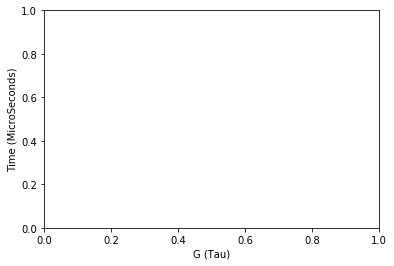

In [6]:
#6.1 Setup Log File
LogInit()

#6.2. Graph Initialization ####################################

#Produce Figure Object
fig = plt.figure()

#Creating a subplot 
ax1 = fig.add_subplot(1,1,1)

#Labels
plt.xlabel('G (Tau)')
plt.ylabel('Time (MicroSeconds)')
###########################################################

In [7]:
#7. Graph Update Function ###############################
def graph_update(i):

    SerialRead()
    
    #Clear Graph
    ax1.clear()

    #Draw the new graph
    global xarray, serialarray
    ax1.plot(xarray, serialarray)

    #Update the title
    #plt.title(graphtitle.join(str(i)))
    #plt.show()
    
# End of graph_update()
#########################################################

In [8]:
#8. Animation Section

#Open Port
if(s_port.isOpen() == False):
    s_port.open()

print("Read begins...")
#--
ani = animation.FuncAnimation(fig, graph_update, frames = 200, interval=100, blit = False, save_count=200) 
        #Wait for 100 ms before updating & Will only save 200 frames
plt.show()
#---
print("Read ends...")


#Save the last snapshot
plt.savefig(session_name.join('.png'), bbox_inches='tight')
#pylab leaves a generous, often undesirable, whitespace around the image → 'tight'

#Save the animation
#ani.save(session_name.join('.mp4'),writer=writer)


#Close port
s_port.close()


#HTML Video display#####################################
# equivalent to rcParams['animation.html'] = 'html5'
#from IPython.display import HTML
#rc('animation', html='jshtml')
#rc
#HTML(ani.to_jshtml())
#########################################################




Read begins...
Read ends...


<Figure size 432x288 with 0 Axes>